## Lung CA prediction 
dataset: url= https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/code

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/alpaco/sryang/Lungca_prediction/survey lung cancer.csv")

In [66]:
df.shape

(309, 16)

In [67]:
df.duplicated().sum() # 데이터 중복확인

33

In [68]:
# 중복제거 
df=df.drop_duplicates()

In [69]:
df.isnull().sum() # 결측치 확인

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [71]:
df.describe(), df.columns

(              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
 count  276.000000  276.000000      276.000000  276.000000     276.000000   
 mean    62.909420    1.543478        1.576087    1.496377       1.507246   
 std      8.379355    0.499011        0.495075    0.500895       0.500856   
 min     21.000000    1.000000        1.000000    1.000000       1.000000   
 25%     57.750000    1.000000        1.000000    1.000000       1.000000   
 50%     62.500000    2.000000        2.000000    1.000000       2.000000   
 75%     69.000000    2.000000        2.000000    2.000000       2.000000   
 max     87.000000    2.000000        2.000000    2.000000       2.000000   
 
        CHRONIC DISEASE     FATIGUE     ALLERGY    WHEEZING  ALCOHOL CONSUMING  \
 count       276.000000  276.000000  276.000000  276.000000         276.000000   
 mean          1.521739    1.663043    1.547101    1.547101           1.550725   
 std           0.500435    0.473529    0.498681    0.498681

In [72]:
from sklearn import preprocessing   

In [73]:
# 성별  남=1/여=(309)
# total = 276 (결측치 33)   

print(df['GENDER'].values)
gen=df['GENDER'].values

print(df['GENDER'].value_counts())

n_f = np.sum(gen == 'F')
n_m = np.sum(gen == 'M')  
print(f"남자: {n_m}명, 여자{n_f}명")  # 남자: 142명, 여자134명

['M' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'M' 'M'
 'F' 'F' 'F' 'F' 'F' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'M' 'F'
 'M' 'F' 'M' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'M'
 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'F'
 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'M' 'M' 'M' 'M' 'F' 'F'
 'F' 'F' 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'M'
 'M' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'F'
 'F' 'F' 'F' 'F' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'M' 'F' 'M'
 'F' 'M' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'M' 'F'
 'M' 'F' 'M' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'F' 'M'
 'F' 'M' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'M' 'M' 'M' 'M' 'F' 'F' 'F'
 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'F' 'M' 'F' 'F' 'F' 'F' 'F' 'M' 'F'
 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'F' 'F' 'F'
 'F' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'M

In [74]:
# 전체 환자 수
total = len(df)

n_m = (df['GENDER'] == 'M').sum()
n_f = (df['GENDER'] == 'F').sum()  

per_m = n_m/total * 100
per_f = n_f/total * 100

print(f" 전체 환자 중 남자 환자 수: {per_m:.1f}%, 여자 환자 수: {per_f:.1f}%") 

 전체 환자 중 남자 환자 수: 51.4%, 여자 환자 수: 48.6%


In [75]:
# 나이 분류: 10,20,30,40,50,60,70,80대이상
age=df['AGE'].values
age, len(age)

(array([69, 74, 59, 63, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 69, 48, 75,
        57, 68, 61, 44, 64, 21, 60, 72, 65, 61, 69, 53, 55, 57, 62, 56, 67,
        59, 59, 60, 56, 56, 60, 68, 63, 77, 52, 70, 72, 62, 64, 70, 60, 56,
        63, 54, 49, 57, 52, 63, 73, 47, 69, 70, 60, 70, 68, 74, 71, 56, 66,
        76, 78, 68, 66, 67, 60, 61, 58, 76, 56, 67, 73, 58, 54, 62, 81, 56,
        60, 66, 62, 62, 55, 62, 71, 52, 59, 48, 60, 61, 59, 64, 81, 64, 62,
        72, 60, 61, 60, 49, 53, 58, 61, 68, 60, 72, 72, 57, 54, 56, 77, 64,
        57, 66, 70, 53, 51, 58, 58, 63, 51, 61, 61, 76, 71, 69, 56, 67, 54,
        63, 47, 62, 65, 63, 64, 65, 51, 56, 70, 58, 67, 62, 74, 69, 64, 75,
        47, 57, 56, 68, 55, 62, 73, 68, 75, 63, 61, 62, 44, 56, 54, 57, 56,
        69, 72, 59, 70, 64, 61, 72, 63, 74, 71, 71, 72, 77, 72, 55, 65, 67,
        69, 55, 51, 64, 63, 69, 64, 59, 73, 63, 60, 74, 65, 79, 62, 71, 63,
        67, 55, 54, 77, 64, 61, 62, 67, 56, 70, 70, 57, 61, 77, 62, 59, 70,
        71, 

In [76]:
# 불리언 마스크를 사용하여 각 연령대별 인원수 계산
n_30 = np.sum((30<= age) & (age <40))
n_40 = np.sum((40<= age) & (age <50))
n_50 = np.sum((50<= age) & (age <60))
n_60 = np.sum((60<= age) & (age <70))
n_70 = np.sum((70<= age) & (age <80))
n_80 = np.sum(80 <= age)

print(f"30대: {n_30}명, 40대: {n_40}명, 50대: {n_50}명, 60대: {n_60}명, 70대: {n_70}명, 80대~: {n_80}명")  

30대: 2명, 40대: 11명, 50대: 78명, 60대: 118명, 70대: 63명, 80대~: 3명


In [ ]:
len(age)

per_30 = n_30/total * 100
per_40 = n_40/total * 100
per_50 = n_50/total * 100
per_60 = n_60/total * 100
per_70 = n_70/total * 100
per_80 = n_80/total * 100

print(f" 전체 환자 중 30대:{per_30:.1f}%,
                      40대:{per_40:.1f}%,
                      50대: {per_50:.1f}%,
                      60대:{per_60:.1f}%,
                      70대: {per_70:.1f}%,
                      80대~: {per_80:.1f}%")

 전체 환자 중 30대:0.7%,40대: 4.0%,50대: 28.3%,60대:42.8%,70대: 22.8%, 80대~: 1.1%


In [ ]:
# 흡연여부 
df['SMOKING'].values  # yes=1/no=2
smk=df['SMOKING'].values
smk, len(smk)

(array([1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
        2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2,
        2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
        1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
        2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
        1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
        1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2,
        2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
        2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
        2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1]),
 276)

In [ ]:
len(smk) # 흡연자: 126(45.7%)명, 비흡연자: 150(54.3%)명

n_smoker = np.sum(smk ==1) 
n_nonsmoker = np.sum(smk ==2)
print(f"흡연자: {n_smoker}명, 비흡연자: {n_nonsmoker}명")  

per_smoker = n_smoker/total * 100
per_nonsmoker = n_nonsmoker/total * 100
print(f" 전체 환자 중 흡연자: {per_smoker:.1f}%, 비흡연자: {per_nonsmoker:.1f}%")

흡연자: 126명, 비흡연자: 150명
 전체 환자 중 흡연자: 45.7%, 비흡연자: 54.3%


In [ ]:
# 음주여부 
df['ALCOHOL CONSUMING'].values  # yes/no
alc=df['ALCOHOL CONSUMING'].values
alc, len(alc)


(array([2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
        1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1,
        1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
        1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
        2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
        1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
        1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1,
        2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
        1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
        2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2]),
 276)

In [ ]:
len(alc) # 음주자: 124명(44.9%), 비음주자: 152(55.1%)명

n_alc = np.sum(alc == 1)
n_nonalc = np.sum(alc == 2)
print(f"음주자: {n_alc}명, 비음주자: {n_nonalc}명")

per_alc = n_alc/total * 100
per_nonalc = n_nonalc/total * 100
print(f" 전체 환자 중 음주자: {per_alc:.1f}%, 비음주자: {per_nonalc:.1f}%")


음주자: 124명, 비음주자: 152명
 전체 환자 중 음주자: 44.9%, 비음주자: 55.1%


In [80]:
# peer pressure
df['PEER_PRESSURE'].values  # yes/no
peer=df['PEER_PRESSURE'].values
peer, len(peer)

(array([1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
        1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
        1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
        1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1,
        1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2,
        2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
        1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
        2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1,
        1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1]),
 276)

In [99]:
len(peer)

n_peer = np.sum(peer == 1)
n_nonpeer = np.sum(peer == 2)
print(f"또래압박 경험자: {n_peer}명, 비경험자: {n_nonpeer}명")  

per_peer = n_peer/total * 100
per_nonpeer = n_nonpeer/total * 100
print(f" 전체 환자 중 또래압박 경험자: {per_peer:.1f}%, 비경험자: {per_nonpeer:.1f}%")

또래압박 경험자: 136명, 비경험자: 140명
 전체 환자 중 또래압박 경험자: 49.3%, 비경험자: 50.7%


In [81]:
# yellow finger
df['YELLOW_FINGERS'].values  # yes/no
yelf=df['YELLOW_FINGERS'].values
yelf, len(yelf)

(array([2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
        1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
        2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
        2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2,
        1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2,
        1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
        2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
        2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
        1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
        1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2]),
 276)

In [107]:
len(yelf)
n_yelf = np.sum(yelf == 1)
n_nonyelf = np.sum(yelf == 2)
print(f"손가락 황변 경험자: {n_yelf}명, 비경험자: {n_nonyelf}명")  
per_yelf = n_yelf/total * 100
per_nonyelf = n_nonyelf/total * 100
print(f"전체 환자 중 손가락 황변 경험자: {per_yelf:.1f}%, 비경험자: {per_nonyelf:.1f}%")   


손가락 황변 경험자: 117명, 비경험자: 159명
전체 환자 중 손가락 황변 경험자: 42.4%, 비경험자: 57.6%


In [ ]:
# 폐암여부
df['LUNG_CANCER'].values  # yes/no
lungca=df['LUNG_CANCER'].values
lungca, len(lungca)

(array(['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
        'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
        'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
        'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YE

In [ ]:
# 남자, 여자 폐암환자 수
lungca_m = np.sum((lungca == 'YES') & (gen == 'M'))
lungca_f = np.sum((lungca == 'YES') & (gen == 'F'))
print(f"남자 폐암환자 수: {lungca_m}명, 여자 폐암환자 수: {lungca_f}명")    

# 폐암환자 수
n_lungca = np.sum(lungca == 'YES')
n_nonlungca = np.sum(lungca == 'NO')
print(f"폐암환자 수: {n_lungca}명, 비폐암환자 수: {n_nonlungca}명") 
print(f"전체환자수:{n_lungca+n_nonlungca}명")

per_lungca = n_lungca/total * 100
per_nonlungca = n_nonlungca/total * 100
print(f"전체 환자 중 폐암환자 수: {per_lungca:.1f}%, 비폐암환자 수: {per_nonlungca:.1f}%")    

# 폐암환자 수 - 남/여 구분
lungca_m = np.sum((lungca == 'YES') & (gen == 'M'))
lungca_f = np.sum((lungca == 'YES') & (gen == 'F'))
print(f"남자 폐암환자 수: {lungca_m}명, 여자 폐암환자 수: {lungca_f}명")

per_lungca_m = lungca_m/n_lungca * 100
per_lungca_f = lungca_f/n_lungca * 100
print(f"폐암환자 중 남자 환자 수: {per_lungca_m:.1f}%, 여자 환자 수: {per_lungca_f:.1f}%")


남자 폐암환자 수: 125명, 여자 폐암환자 수: 113명
폐암환자 수: 238명, 비폐암환자 수: 38명
전체환자수:276명
전체 환자 중 폐암환자 수: 86.2%, 비폐암환자 수: 13.8%
남자 폐암환자 수: 125명, 여자 폐암환자 수: 113명
폐암환자 중 남자 환자 수: 52.5%, 여자 환자 수: 47.5%


In [113]:
# 폐암환자 수 - 나이대별
lungca_30 = np.sum((lungca == 'YES') & (30<= age) & (age <40))
lungca_40 = np.sum((lungca == 'YES') & (40<= age) & (age <50))
lungca_50 = np.sum              ((lungca == 'YES') & (50<= age) & (age <60))
lungca_60 = np.sum((lungca == 'YES') & (60<= age) & (age <70))
lungca_70 = np.sum((lungca == 'YES') & (70<= age) & (age <80))
lungca_80 = np.sum((lungca == 'YES') & (80 <= age))
print(f"폐암환자 수 - 30대: {lungca_30}명, 40대: {lungca_40}명, 50대: {lungca_50}명, 60대: {lungca_60}명, 70대: {lungca_70}명, 80대~: {lungca_80}명")   

per_lungca_30 = lungca_30/n_lungca * 100
per_lungca_40 = lungca_40/n_lungca * 100
per_lungca_50 = lungca_50/n_lungca * 100
per_lungca_60 = lungca_60/n_lungca * 100
per_lungca_70 = lungca_70/n_lungca * 100
per_lungca_80 = lungca_80/n_lungca * 100
print(f"폐암환자 수 - 30대:{per_lungca_30:.1f}%, 40대:{per_lungca_40:.1f}%, 50대: {per_lungca_50:.1f}%, 60대:{per_lungca_60:.1f}%, 70대: {per_lungca_70:.1f}%, 80대~: {per_lungca_80:.1f}%")   

폐암환자 수 - 30대: 2명, 40대: 9명, 50대: 65명, 60대: 99명, 70대: 61명, 80대~: 2명
폐암환자 수 - 30대:0.8%, 40대:3.8%, 50대: 27.3%, 60대:41.6%, 70대: 25.6%, 80대~: 0.8%


In [86]:
# 호흡기 증상 유무 : (1) shortness of breath
df['SHORTNESS OF BREATH'].values  # yes/no
sbreath=df['SHORTNESS OF BREATH'].values
sbreath, len(sbreath)


(array([2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
        2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
        1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
        2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
        1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
        1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
        1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2]),
 276)

In [123]:
n_sob = np.sum(sbreath == 1)
n_nonsob = np.sum(sbreath == 2)
print(f"호흡곤란 경험자: {n_sob}명, 비경험자: {n_nonsob}명")    

per_sob = n_sob/total * 100
per_nonsob = n_nonsob/total * 100
print(f"전체 환자 중 호흡곤란 경험자: {per_sob:.1f}%, 비경험자: {per_nonsob:.1f}%") 

호흡곤란 경험자: 102명, 비경험자: 174명
전체 환자 중 호흡곤란 경험자: 37.0%, 비경험자: 63.0%


In [87]:
# 호흡기 증상 유무 : (2) coughing
df['COUGHING'].values  # yes/no
cough=df['COUGHING'].values
cough, len(cough)

(array([2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
        1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
        2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1,
        1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,
        2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
        2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
        1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2,
        2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1,
        2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2]),
 276)

In [124]:
n_cough = np.sum(cough == 1)
n_noncough = np.sum(cough == 2)
print(f"기침 경험자: {n_cough}명, 비경험자: {n_noncough}명")

per_cough = n_cough/total * 100
per_noncough = n_noncough/total * 100
print(f"전체 환자 중 기침 경험자: {per_cough:.1f}%, 비경험자: {per_noncough:.1f}%")

기침 경험자: 117명, 비경험자: 159명
전체 환자 중 기침 경험자: 42.4%, 비경험자: 57.6%


In [88]:
# 호흡기 증상 유무 : (3) wheezing
df['WHEEZING'].values  # yes/no
wheez=df['WHEEZING'].values
wheez, len(wheez)

(array([2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
        1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
        2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
        1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
        1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
        2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
        2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2,
        1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
        2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1,
        2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2]),
 276)

In [125]:
n_wheez = np.sum(wheez == 1)
n_nonwheez = np.sum(wheez == 2)
print(f"wheezing 유: {n_wheez}명, wheezing 무: {n_nonwheez}명")

per_wheez = n_wheez/total * 100
per_nonwheez = n_nonwheez/total * 100
print(f"전체 환자 중 wheezing 유: {per_wheez:.1f}%, wheezing 무: {per_nonwheez:.1f}%")

wheezing 유: 125명, wheezing 무: 151명
전체 환자 중 wheezing 유: 45.3%, wheezing 무: 54.7%


In [130]:
# 폐암환자 수 - 흡연여부에 따라 
lungca_smoker = np.sum((lungca == 'YES') & (smk == 1))
lungca_nonsmoker = np.sum((lungca == 'YES') & (smk == 2))
print(f"폐암환자 중 흡연자 수: {lungca_smoker}명, 비흡연자 수: {lungca_nonsmoker}명")   

per_lungca_smoker = lungca_smoker/n_lungca * 100
per_lungca_nonsmoker = lungca_nonsmoker/n_lungca * 100
print(f"폐암환자 중 흡연자 수: {per_lungca_smoker:.1f}%, 비흡연자 수: {per_lungca_nonsmoker:.1f}%")

폐암환자 중 흡연자 수: 107명, 비흡연자 수: 131명
폐암환자 중 흡연자 수: 45.0%, 비흡연자 수: 55.0%


In [131]:
# 폐암환자 수 - 음주여부에 따라 
lungca_alc = np.sum((lungca == 'YES') & (alc == 1))
lungca_nonalc = np.sum((lungca == 'YES') & (alc == 2))
print(f"폐암환자 중 음주자 수: {lungca_alc}명, 비음주자 수: {lungca_nonalc}명") 

per_lungca_alc = lungca_alc/n_lungca * 100
per_lungca_nonalc = lungca_nonalc/n_lungca * 100
print(f"폐암환자 중 음주자 수: {per_lungca_alc:.1f}%, 비음주자 수: {per_lungca_nonalc:.1f}%") 

폐암환자 중 음주자 수: 93명, 비음주자 수: 145명
폐암환자 중 음주자 수: 39.1%, 비음주자 수: 60.9%


In [132]:
# 폐암환자 수 - 또래압박 경험여부
lungca_peer = np.sum((lungca == 'YES') & (peer == 1))
lungca_nonpeer = np.sum((lungca == 'YES') & (peer == 2))
print(f"폐암환자 중 또래압박 경험자 수: {lungca_peer}명, 비경험자 수: {lungca_nonpeer}명") 

per_lungca_peer = lungca_peer/n_lungca * 100
per_lungca_nonpeer = lungca_nonpeer/n_lungca * 100
print(f"폐암환자 중 또래압박 경험자 수: {per_lungca_peer:.1f}%, 비경험자 수: {per_lungca_nonpeer:.1f}%")    


폐암환자 중 또래압박 경험자 수: 108명, 비경험자 수: 130명
폐암환자 중 또래압박 경험자 수: 45.4%, 비경험자 수: 54.6%


In [118]:
# 폐암환자 수 - 손가락 황변 경험여부
lungca_yelf = np.sum((lungca == 'YES') & (yelf == 1))
lungca_nonyelf = np.sum((lungca == 'YES') & (yelf == 2))
print(f"폐암환자 중 손가락 황변 경험자 수: {lungca_yelf}명, 비경험자 수: {lungca_nonyelf}명") 

per_lungca_yelf = lungca_yelf/n_lungca * 100
per_lungca_nonyelf = lungca_nonyelf/n_lungca * 100
print(f"폐암환자 중 손가락 황변 경험자 수: {per_lungca_yelf:.1f}%, 비경험자 수: {per_lungca_nonyelf:.1f}%")

폐암환자 중 손가락 황변 경험자 수: 92명, 비경험자 수: 146명
폐암환자 중 손가락 황변 경험자 수: 38.7%, 비경험자 수: 61.3%


In [83]:
# chest pain 유무
df['CHEST PAIN'].values  # yes/no
chest=df['CHEST PAIN'].values
chest, len(chest)

(array([2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
        1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
        1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
        2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2,
        1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2,
        2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
        1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2,
        2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
        2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
        1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
        1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
        2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2]),
 276)

In [ ]:
n_pain = np.sum(chest == 1)
n_nonpain = np.sum(chest == 2)
print(f"흉통 경험자: {n_pain}명, 비경험자: {n_nonpain}명")  

per_pain = n_pain/total * 100
per_nonpain = n_nonpain/total * 100
print(f"전체 환자 중 흉통 경험자: {per_pain:.1f}%, 비경험자: {per_nonpain:.1f}%")

흉통 경험자: 122명, 비경험자: 154명
 전체 환자 중 흉통 경험자: 44.2%, 비경험자: 55.8%


In [84]:
# chronic dz
df['CHRONIC DISEASE'].values  # yes/no
chro=df['CHRONIC DISEASE'].values
chro, len(chro)

(array([1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
        2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1,
        2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2,
        2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1,
        2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2,
        1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
        1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1,
        1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
        2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1,
        2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
        1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1]),
 276)

In [121]:
n_chronic = np.sum(chro == 1)
n_nonchronic = np.sum(chro == 2)
print(f"만성질환자: {n_chronic}명, 비-만성질환자: {n_nonchronic}명")

per_chronic = n_chronic/total * 100
per_nonchronic = n_nonchronic/total * 100
print(f"전체 환자 중 만성질환자: {per_chronic:.1f}%, 비-만성질환자: {per_nonchronic:.1f}%")

만성질환자: 132명, 비-만성질환자: 144명
전체 환자 중 만성질환자: 47.8%, 비-만성질환자: 52.2%


In [85]:
# allergy
df['ALLERGY'].values  # yes/no
allerg=df['ALLERGY'].values
allerg, len(allerg)

(array([1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
        2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2,
        1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1,
        2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1,
        2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2,
        1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
        1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
        2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
        2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
        2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1]),
 276)

In [122]:
n_allergy = np.sum(allerg == 1)
n_nonallergy = np.sum(allerg == 2)
print(f"알레르기 경험자: {n_allergy}명, 비경험자: {n_nonallergy}명")

per_allergy = n_allergy/total * 100
per_nonallergy = n_nonallergy/total * 100
print(f"전체 환자 중 알레르기 경험자: {per_allergy:.1f}%, 비경험자: {per_nonallergy:.1f}%")

알레르기 경험자: 125명, 비경험자: 151명
전체 환자 중 알레르기 경험자: 45.3%, 비경험자: 54.7%


In [89]:
# Anxiety
df['ANXIETY'].values  # yes/no
anx=df['ANXIETY'].values
anx, len(anx)

(array([2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
        1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1,
        1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
        2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2,
        1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2,
        2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
        1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
        2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
        1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
        1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
        1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
        1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2]),
 276)

In [126]:
n_anx = np.sum(anx == 1)
n_nonanx = np.sum(anx == 2)
print(f"불안경험: {n_anx}명, 불안경험 무: {n_nonanx}명")

per_anx = n_anx/total * 100
per_nonanx = n_nonanx/total * 100
print(f"전체 환자 중 불안경험자: {per_anx:.1f}%, 불안경험 무: {per_nonanx:.1f}%")

불안경험: 139명, 불안경험 무: 137명
전체 환자 중 불안경험자: 50.4%, 불안경험 무: 49.6%


In [90]:
# Fatigue
df['FATIGUE'].values 
fat=df['FATIGUE'].values
fat, len(fat)

(array([2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1,
        2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2,
        1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
        2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
        1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
        2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
        2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2]),
 276)

In [127]:
n_fatig = np.sum(fat == 1)
n_nonfatig = np.sum(fat == 2)
print(f"피로감 경험자: {n_fatig}명, 비경험자: {n_nonfatig}명")  

per_fatig = n_fatig/total * 100
per_nonfatig = n_nonfatig/total * 100
print(f"전체 환자 중 피로감 경험자: {per_fatig:.1f}%, 비경험자: {per_nonfatig:.1f}%")

피로감 경험자: 93명, 비경험자: 183명
전체 환자 중 피로감 경험자: 33.7%, 비경험자: 66.3%


In [91]:
# Swallowing difficulty
df['SWALLOWING DIFFICULTY'].values  # yes/no
swal=df['SWALLOWING DIFFICULTY'].values
swal, len(swal)

(array([2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
        1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1,
        2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2,
        1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
        1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2,
        1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2,
        2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
        2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
        2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2,
        1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
        1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
        1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2]),
 276)

In [129]:
n_swallow = np.sum(swal == 1)
n_nonswallow = np.sum(swal == 2)
print(f"삼킴곤란-유: {n_swallow}명, 삼킴곤란-무: {n_nonswallow}명")

per_swallow = n_swallow/total * 100
per_nonswallow = n_nonswallow/total * 100
print(f"전체 환자 중 삼킴곤란-유: {per_swallow:.1f}%, 삼킴곤란-무: {per_nonswallow:.1f}%")  

삼킴곤란-유: 147명, 삼킴곤란-무: 129명
전체 환자 중 삼킴곤란-유: 53.3%, 삼킴곤란-무: 46.7%


### 인구학적 특성 
전체환자수:276명

    성별
        남 : 여 = 142(51.4%) : 134(48.6%)

    나이
        30 : 2명(0.7%), 
        40 : 11명(4.0%),
        50 : 78명(28.3%),
        60 : 118명(42.8%),
        70 : 63명(22.8%), 
        80대 이상 : 3명(1.1%) 

    폐암진단 YES: 238명, NO: 38명
            폐암환자: 남-125명, 여-113명
    호흡기 증상 유무
        (1) shortness of breath - YES: 102명(37.0%), NO: 174명(63%)
        (2) coughing - YES: 117명(42.4%), NO: 159명(57.6%)
        (3) wheezing - YES: 125명(45.3%), NO: 151명(54.7%)

    흡연여부          YES: 126(45.7%)명, No: 150(54.3%)명
    음주여부          YES: 124명(44.9%), No: 152(55.1%)명
    peer pressure     YES: 136명(49.3%), No: 140명(50.7%)
    yellow finger     YES: 117명(42.4%), No: 159명(57.6%)

    chest pain  YES: 122명(44.2%), No: 154명(55.8%)
    chronic dz    YES: 132명(47.8%), No: 144명(52.2%)
    Allergy       YES: 125명(45.3%), No: 151명(54.7%)

    Anxiety  YES: 139명(50.4%), NO: 137명(49.6%)
    Fatigue  YES: 93명(33.7%), NO: 183명(66.3%)
    Swallowing difficulty YES: 147명(53.3%), NO: 129명(46.7%)

In [143]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

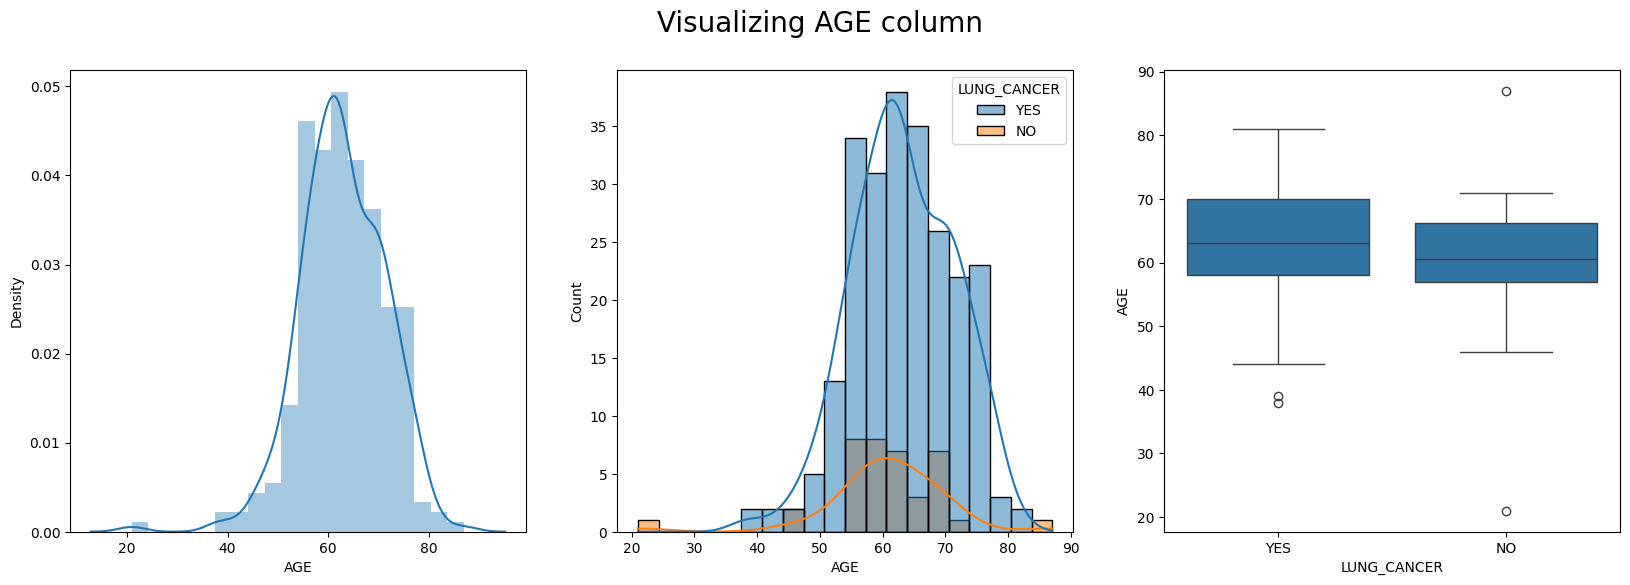

In [144]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

Text(0.5, 0.98, 'Lung Cancer & Categories')

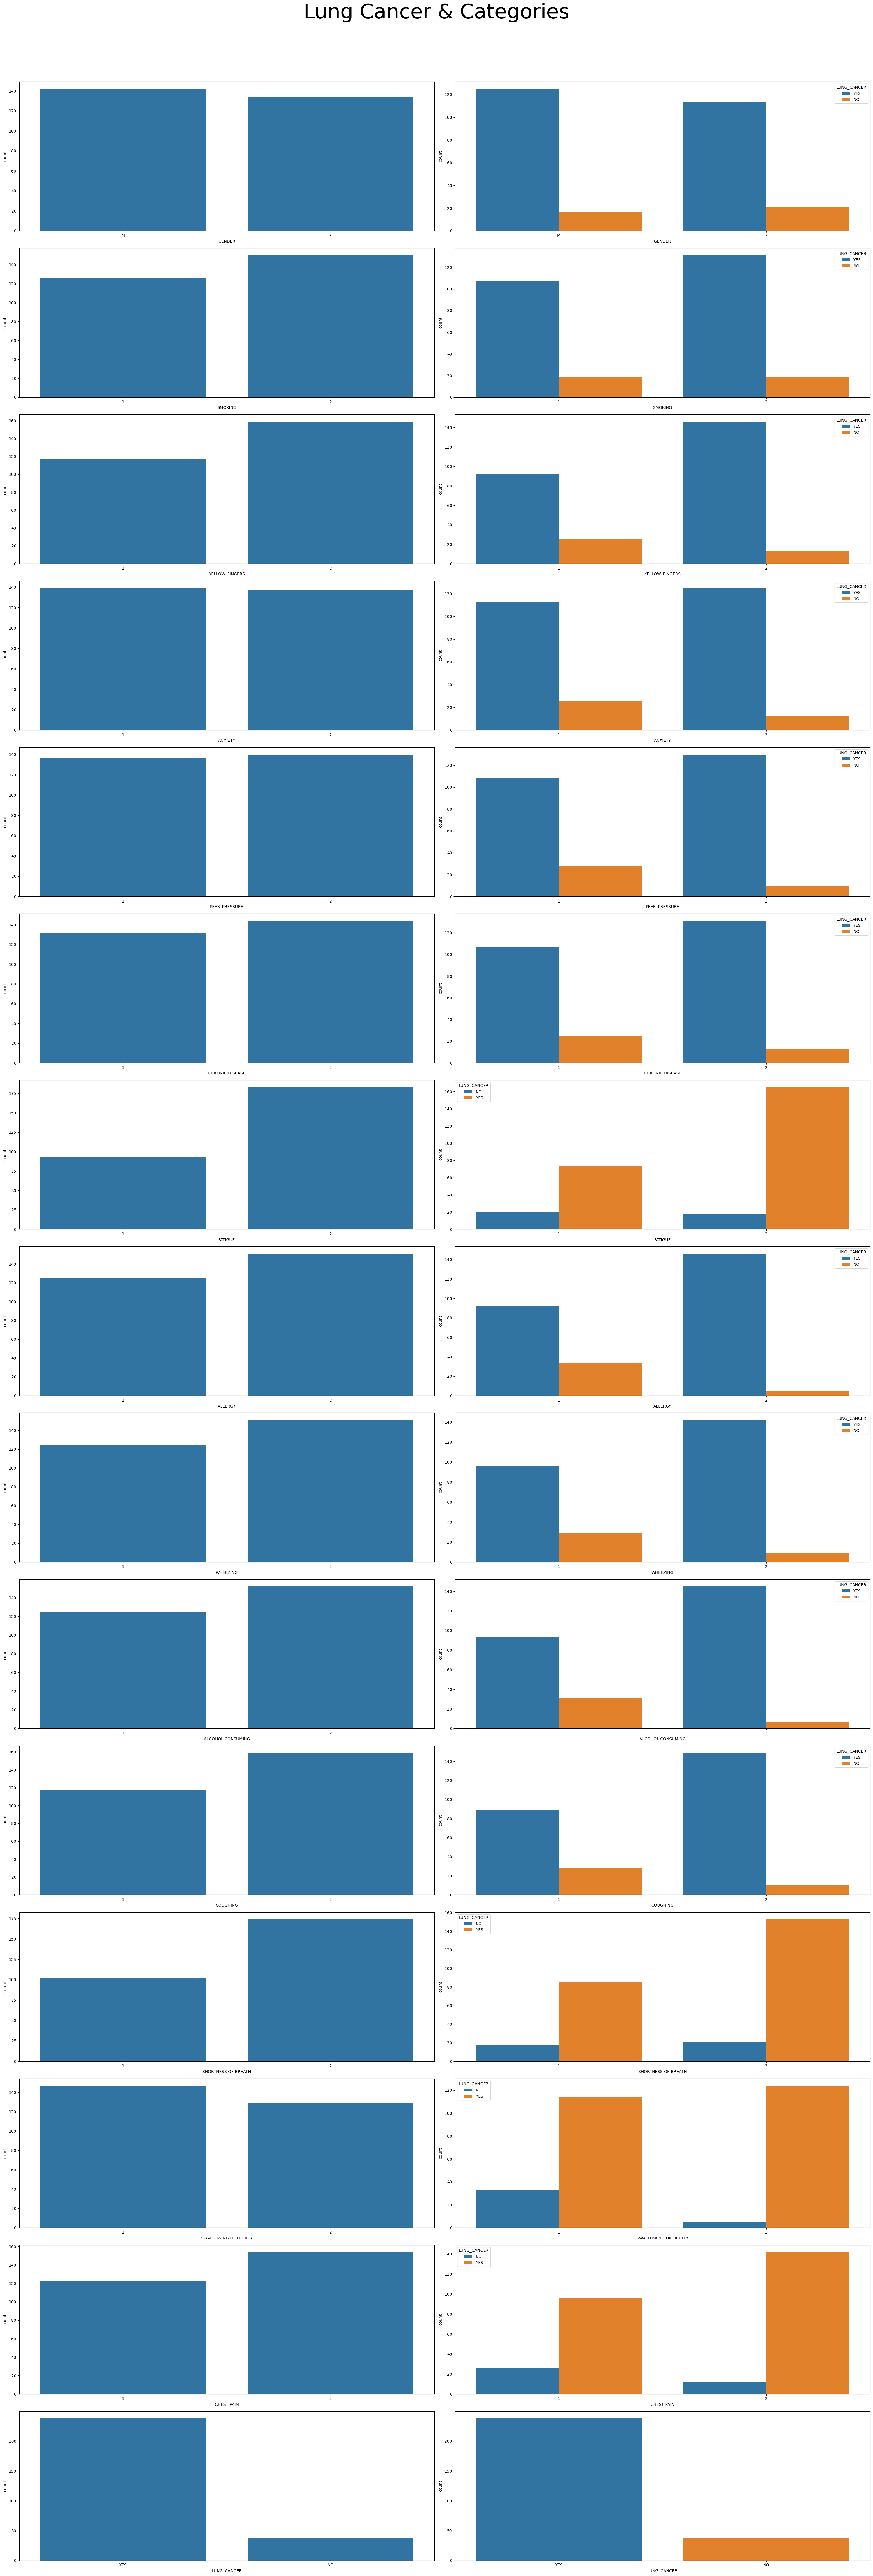

In [160]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0]) # normal
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Lung Cancer & Categories",fontsize=50)

Text(0.5, 0.98, 'AGE vs other Categories')

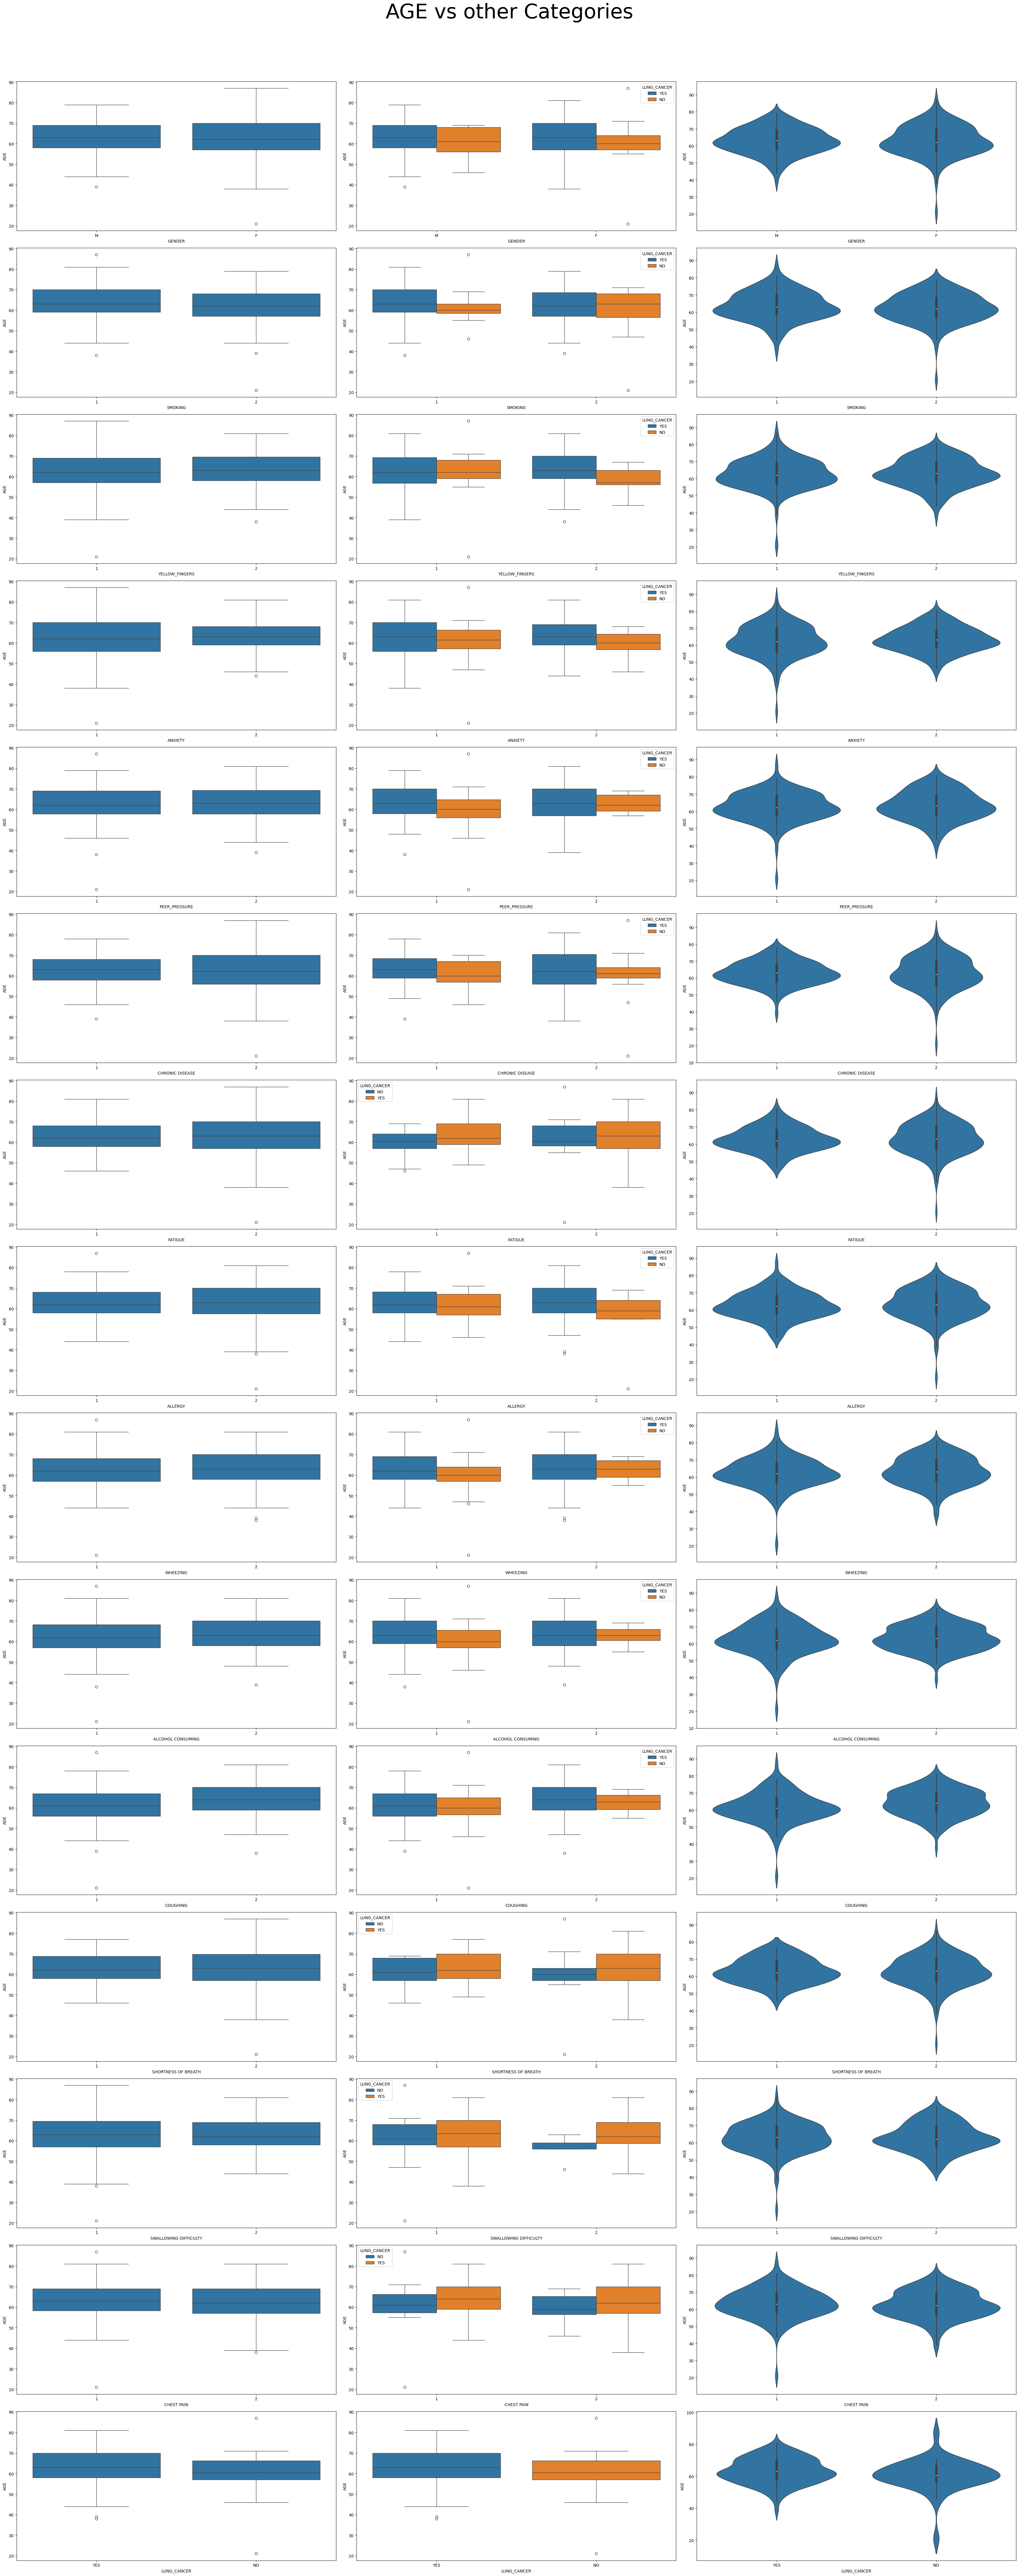

In [162]:
fig,ax = plt.subplots(15,3,figsize=(35,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("AGE vs other Categories",fontsize=50)

In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')